In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [2]:
# load the data
df = pd.read_csv('socialMedia.csv')
df.head()

,Platform,PostType,Post Content,Post Timestamp,Date,Weekday Type,Time,Time Periods,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Age Group
0,LinkedIn,Video,Section admit on time section mission key.,3/7/2024 23:49,3/7/2024 (Thursday),Weekday,23:49:22,Night,624,351,176,8842,2230,57.95,53,Senior Adults
1,LinkedIn,Image,Option resource street may north just economic.,3/7/2024 23:39,3/7/2024 (Thursday),Weekday,23:39:46,Night,154,196,184,7710,4827,32.88,57,Senior Adults
2,Twitter,Link,Daughter reflect significant finish.,3/7/2024 23:19,3/7/2024 (Thursday),Weekday,23:19:45,Night,708,495,42,5667,3582,59.52,65,Senior Adults
3,LinkedIn,Video,Them accept again physical poor wish.,3/7/2024 23:04,3/7/2024 (Thursday),Weekday,23:04:39,Night,37,170,108,4281,4178,25.87,59,Senior Adults
4,Instagram,Video,Think way star question cold century general c...,3/7/2024 22:52,3/7/2024 (Thursday),Weekday,22:52:44,Night,629,145,125,7353,4013,38.28,49,Senior Adults


In [3]:
# select the data by calculating the average number of Likes for each Platform and PostType
filter_df = df.groupby(['Platform', 'PostType'])['Likes'].mean().reset_index()

# round the average likes to 2 decimal places
filter_df['Likes'] = filter_df['Likes'].round(2)

# rename columns to match the required format
filter_df.rename(columns={'Likes': 'AvgLikes'}, inplace=True)

# save the data to a CSV file
file_path = "SocialMediaAvg.csv"
filter_df.to_csv(file_path, index=False)

In [4]:
# select the data by calculating the average number of Likes for each Date
filter_date_df = df.groupby("Date")["Likes"].mean().reset_index()

# rename columns to match the required format
filter_date_df.rename(columns={'Likes': 'AvgLikes'}, inplace=True)

# save the data as SocialMediaTime.csv
output_file_path = "SocialMediaTime.csv"
filter_date_df.to_csv(output_file_path, index=False)


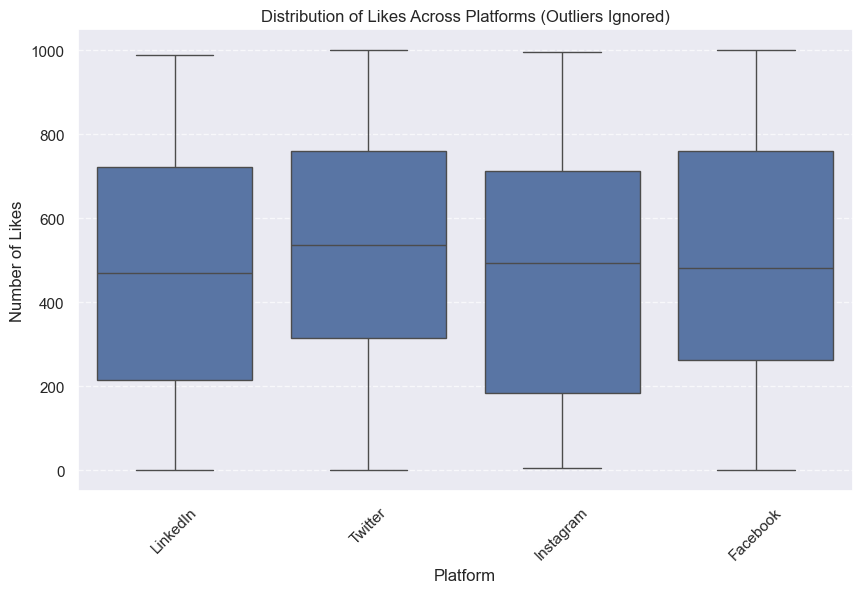

In [5]:
# Create a side-by-side boxplot of Likes across Platforms (ignoring outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Platform", y="Likes", data=df, showfliers=False)  # Ignoring outliers

# Set plot labels and title
plt.xlabel("Platform")
plt.ylabel("Number of Likes")
plt.title("Distribution of Likes Across Platforms (Outliers Ignored)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

/var/folders/8m/11jr6h1x1qv7hw84xjyl69m80000gn/T/ipykernel_8395/3405483956.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Platform", y="Likes", hue="PostType", data=avg_likes, ci=None)


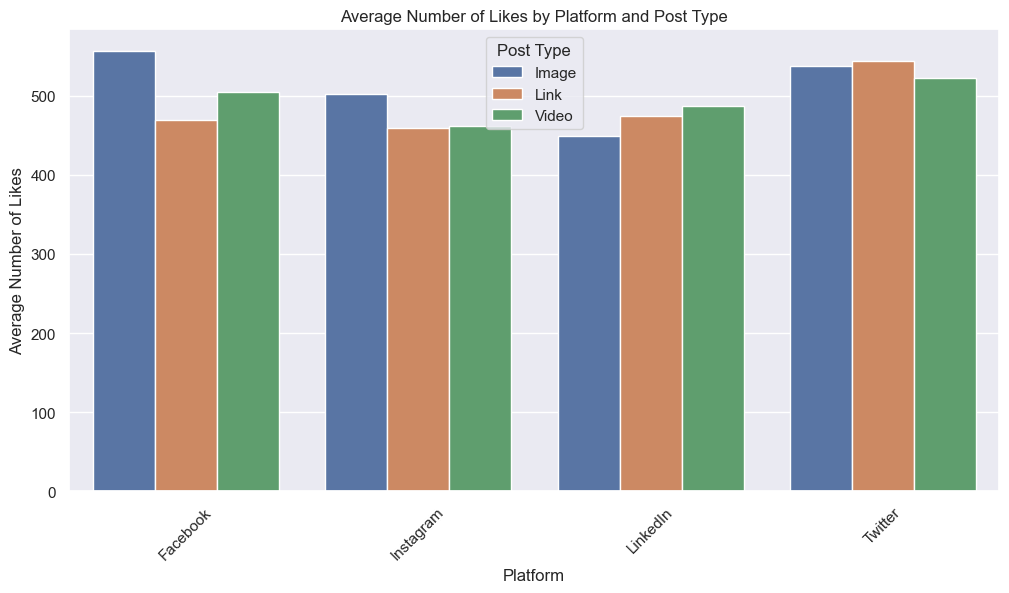

In [6]:
import numpy as np

# Compute the average number of Likes for each combination of Platform and PostType
avg_likes = df.groupby(["Platform", "PostType"])["Likes"].mean().reset_index()

# Create a side-by-side bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Platform", y="Likes", hue="PostType", data=avg_likes, ci=None)

# Set plot labels and title
plt.xlabel("Platform")
plt.ylabel("Average Number of Likes")
plt.title("Average Number of Likes by Platform and Post Type")
plt.xticks(rotation=45)
plt.legend(title="Post Type")

# Show the plot
plt.show()

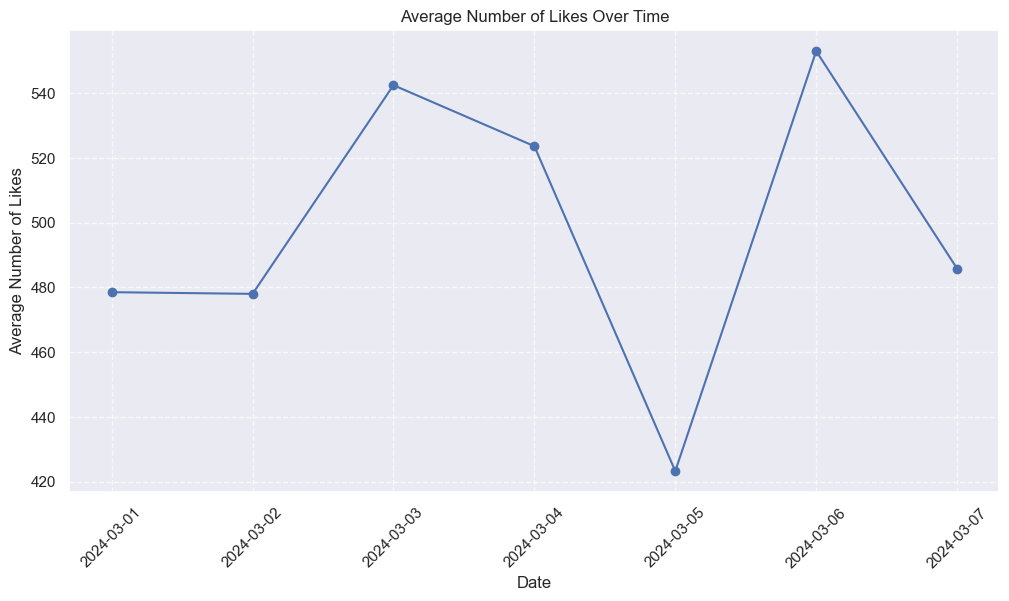

In [7]:
# Convert Date to a datetime format for better plotting
filter_date_df["Date"] = pd.to_datetime(filter_date_df["Date"].str.split(" ").str[0])

# Sort by Date to ensure correct plotting order
filter_date_df = filter_date_df.sort_values("Date")

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(filter_date_df["Date"], filter_date_df["AvgLikes"], marker="o", linestyle="-")

# Set plot labels and title
plt.xlabel("Date")
plt.ylabel("Average Number of Likes")
plt.title("Average Number of Likes Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()
